In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data-penumpang-kapal.csv to data-penumpang-kapal.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['data-penumpang-kapal.csv']))
df.head()

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,1/1/2020,MUARA ANGKE,13,23,549,3989
1,1/2/2020,MUARA ANGKE,15,13,831,1374
2,1/3/2020,MUARA ANGKE,11,12,921,800
3,1/4/2020,MUARA ANGKE,17,7,1838,551
4,1/5/2020,MUARA ANGKE,7,15,600,1768


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tanggal          1821 non-null   object
 1   pelabuhan        1821 non-null   object
 2   kapal_berangkat  1821 non-null   int64 
 3   kapal_tiba       1821 non-null   int64 
 4   penumpang_naik   1821 non-null   int64 
 5   penumpang_turun  1821 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 85.5+ KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kapal_berangkat,1821.0,2.950577,3.251335,0.0,1.0,2.0,4.0,42.0
kapal_tiba,1821.0,3.000000,3.444537,0.0,1.0,2.0,4.0,53.0
penumpang_naik,1821.0,81.636463,193.061855,0.0,0.0,18.0,86.0,2785.0
penumpang_turun,1821.0,80.484898,202.589417,0.0,0.0,17.0,90.0,3989.0


In [ ]:
df.isnull().sum()

tanggal            0
pelabuhan          0
kapal_berangkat    0
kapal_tiba         0
penumpang_naik     0
penumpang_turun    0
dtype: int64

In [ ]:
df['tanggal'] = pd.to_datetime(df.tanggal)
df

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2020-01-01,MUARA ANGKE,13,23,549,3989
1,2020-01-02,MUARA ANGKE,15,13,831,1374
2,2020-01-03,MUARA ANGKE,11,12,921,800
3,2020-01-04,MUARA ANGKE,17,7,1838,551
4,2020-01-05,MUARA ANGKE,7,15,600,1768
...,...,...,...,...,...,...
1816,2020-06-26,SABIRA,1,1,8,8
1817,2020-06-27,SABIRA,0,1,0,12
1818,2020-06-28,SABIRA,1,0,12,0
1819,2020-06-29,SABIRA,1,2,0,23


In [ ]:
df['pelabuhan'].value_counts()

MARINA ANCOL        183
PRAMUKA/PANGGANG    182
HARAPAN             182
TIDUNG/PAYUNG       182
UNTUNG JAWA         182
LANCANG             182
PARI                182
MUARA ANGKE         182
KELAPA              182
SABIRA              182
Name: pelabuhan, dtype: int64

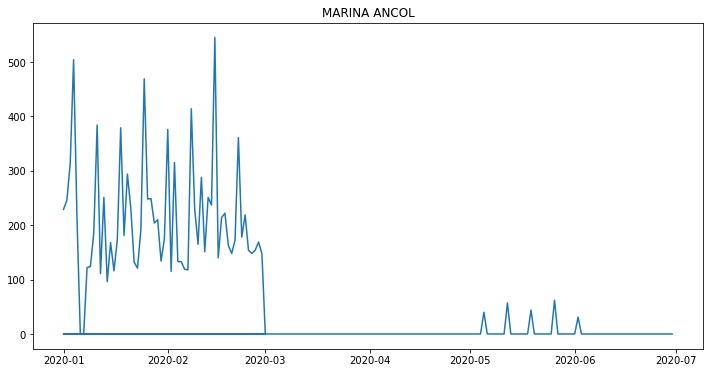

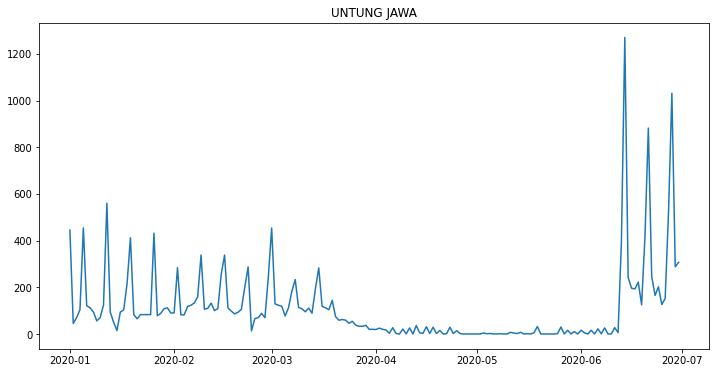

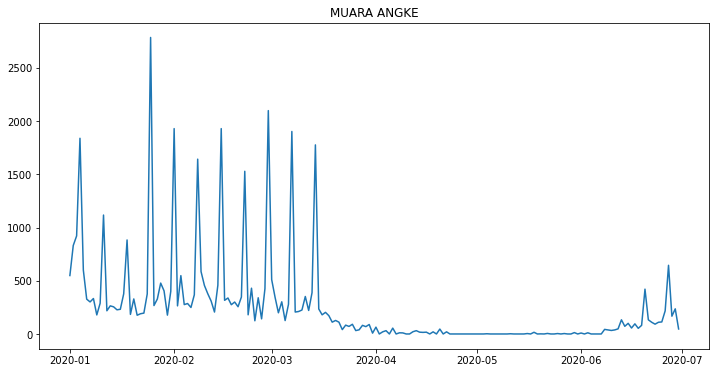

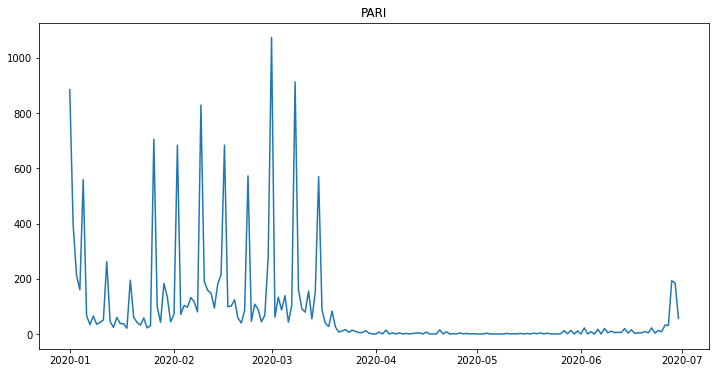

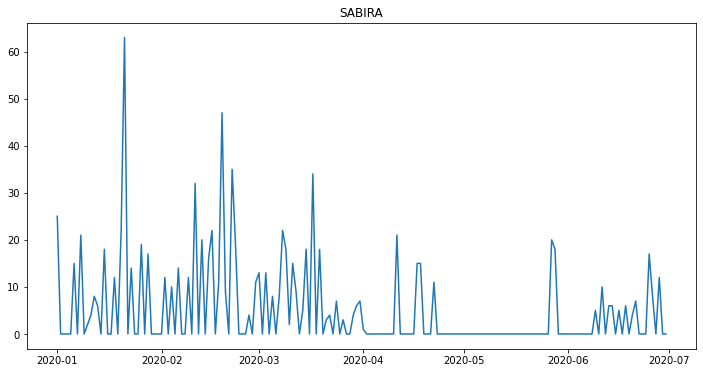

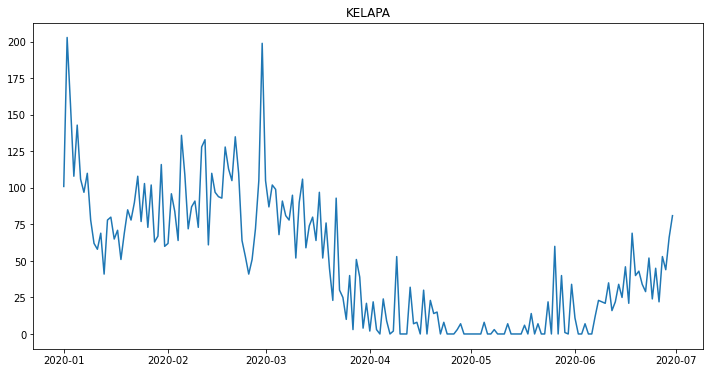

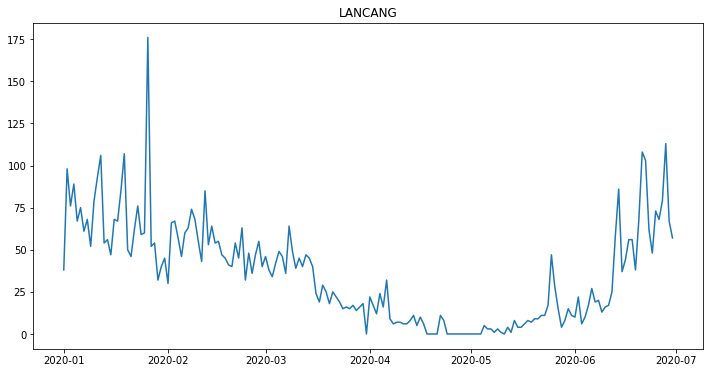

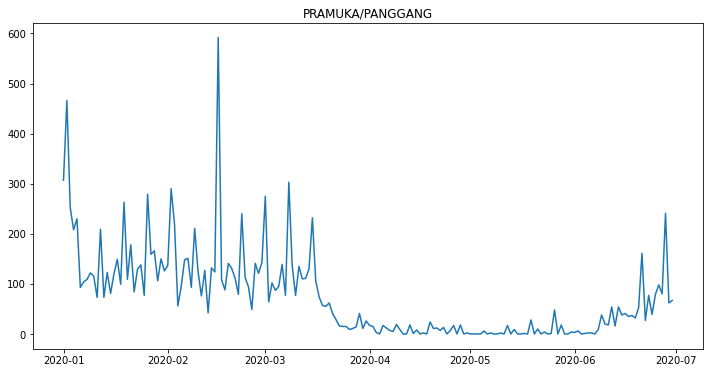

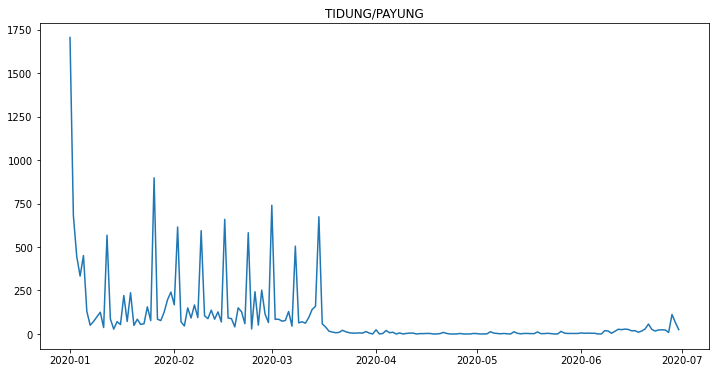

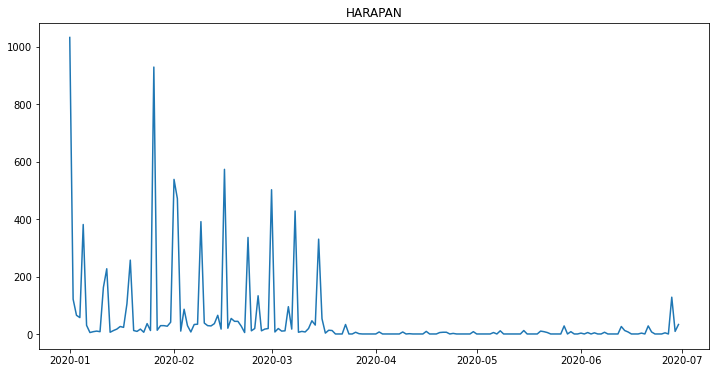

In [ ]:
import matplotlib.pyplot as plt

pelabuhan = ['MARINA ANCOL', 'UNTUNG JAWA', 'MUARA ANGKE', 'PARI',
             'SABIRA', 'KELAPA', 'LANCANG', 'PRAMUKA/PANGGANG',
             'TIDUNG/PAYUNG', 'HARAPAN']

for i in pelabuhan :
  tgl = df[df.pelabuhan == i]['tanggal']
  penumpang = df[df.pelabuhan == i]['penumpang_naik']
  plt.figure(figsize=(12,6))
  plt.plot(tgl, penumpang)
  plt.title(i)
  plt.show

<function matplotlib.pyplot.show>

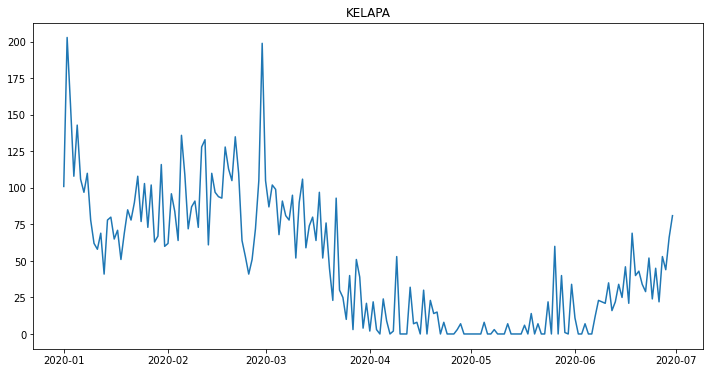

In [ ]:
x = df[df.pelabuhan == 'KELAPA']['tanggal']
y = df[df.pelabuhan == 'KELAPA']['penumpang_naik']
plt.figure(figsize=(12,6))
plt.plot(x, y)
plt.title('KELAPA')
plt.show

In [ ]:
df_kelapa = pd.concat([x, y], axis = 1)
df_kelapa

,tanggal,penumpang_naik
217,2020-01-01,101
218,2020-01-02,203
219,2020-01-03,157
220,2020-01-04,108
221,2020-01-05,143
...,...,...
1756,2020-06-26,22
1757,2020-06-27,53
1758,2020-06-28,44
1759,2020-06-29,66


In [ ]:
df_kelapa = df_kelapa.set_index(['tanggal'])
df_kelapa

,penumpang_naik
tanggal,
2020-01-01,101
2020-01-02,203
2020-01-03,157
2020-01-04,108
2020-01-05,143
...,...
2020-06-26,22
2020-06-27,53
2020-06-28,44


In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=df_kelapa.index, y=df_kelapa['penumpang_naik'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='Penumpang Naik',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Penumpang Naik")
fig.show()

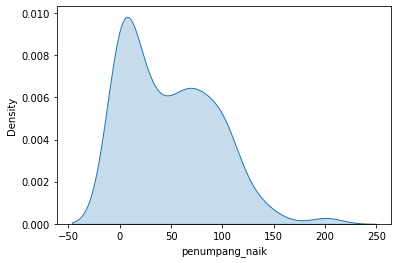

In [ ]:
import seaborn as sns
sns.kdeplot(df_kelapa['penumpang_naik'],shade=True)

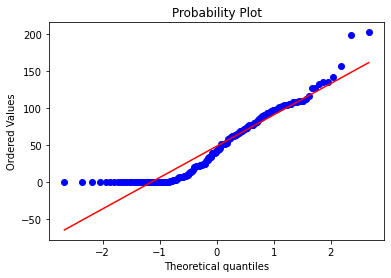

In [ ]:
import scipy.stats
import pylab
scipy.stats.probplot(df_kelapa.penumpang_naik,plot=pylab)
pylab.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")

In [ ]:
dicky_fuller_test(df_kelapa['penumpang_naik'])

ADF Statistic: -1.984493
p-value: 0.293413
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576
Fail to reject the null hypothesis (H0), the data is non-stationary


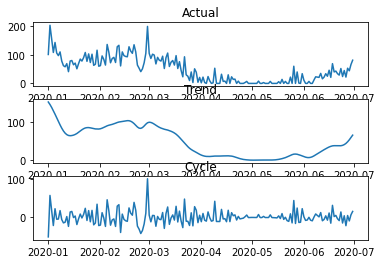

In [ ]:
import statsmodels.api as sm
series = df_kelapa
cycle, trend = sm.tsa.filters.hpfilter(series, 50)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Actual')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()

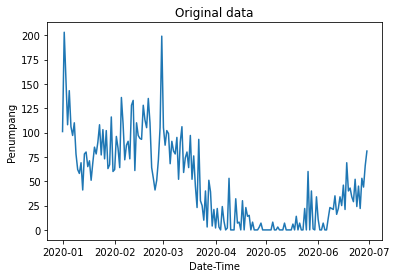

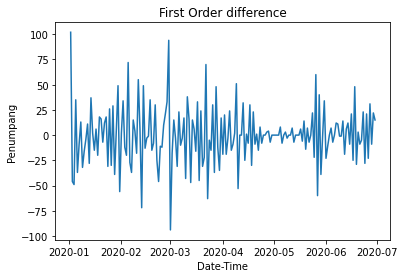

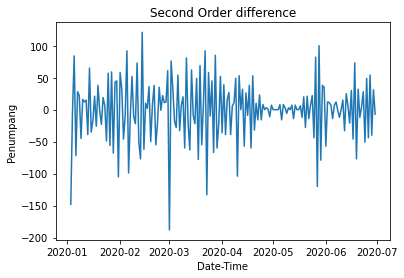

In [ ]:
first_order = df_kelapa.diff()
second_order = first_order.diff()
plt.plot(df_kelapa)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Original data')
plt.show()
plt.plot(first_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('First Order difference')
plt.show()
plt.plot(second_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Second Order difference')
plt.show()

In [ ]:
first_order.dropna(inplace=True)
dicky_fuller_test(first_order['penumpang_naik'])

ADF Statistic: -8.509431
p-value: 0.000000
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576
Reject the null hypothesis (H0), the data is stationary.


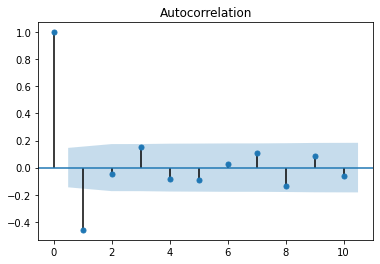

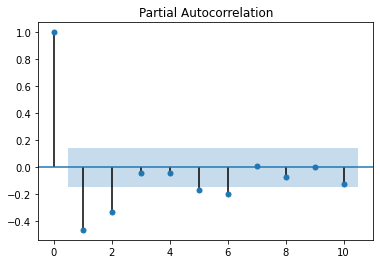

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(first_order, lags=10);
plot_pacf(first_order, lags=10);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting ARIMA model


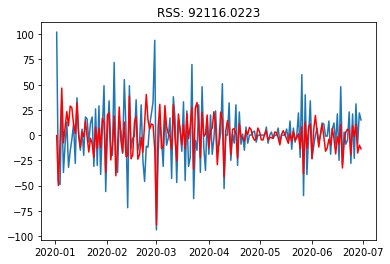

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_kelapa, order=(5,1,3))
results_ARIMA = model.fit()
plt.plot(first_order)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - first_order['penumpang_naik'])**2))
print('Plotting ARIMA model')

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predict = results_ARIMA.predict()
mean_squared_error(first_order, predict)

508.9283000152428

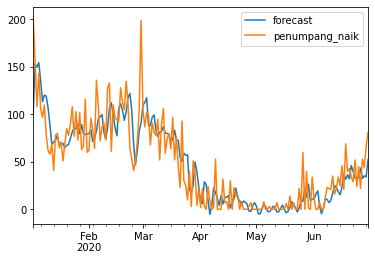

In [ ]:
results_ARIMA.plot_predict()
plt.show()

In [ ]:
x_untung = df[df.pelabuhan == 'UNTUNG JAWA']['tanggal']
y_untung = df[df.pelabuhan == 'UNTUNG JAWA']['penumpang_naik']

In [ ]:
df_untung = pd.concat([x_untung, y_untung], axis = 1)
df_untung

,tanggal,penumpang_naik
62,2020-01-01,445
63,2020-01-02,45
64,2020-01-03,70
65,2020-01-04,104
66,2020-01-05,454
...,...,...
1606,2020-06-26,152
1607,2020-06-27,522
1608,2020-06-28,1031
1609,2020-06-29,288


In [ ]:
df_untung = df_untung.set_index(['tanggal'])
df_untung

,penumpang_naik
tanggal,
2020-01-01,445
2020-01-02,45
2020-01-03,70
2020-01-04,104
2020-01-05,454
...,...
2020-06-26,152
2020-06-27,522
2020-06-28,1031


In [ ]:
dicky_fuller_test(df_untung['penumpang_naik'])

ADF Statistic: -0.564727
p-value: 0.878755
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
Fail to reject the null hypothesis (H0), the data is non-stationary


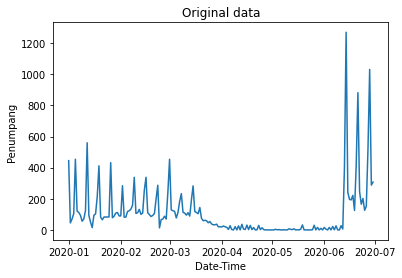

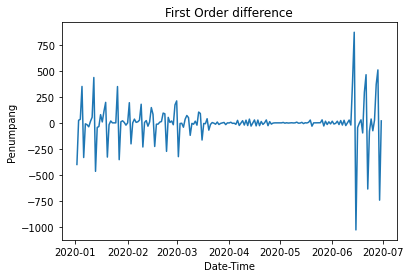

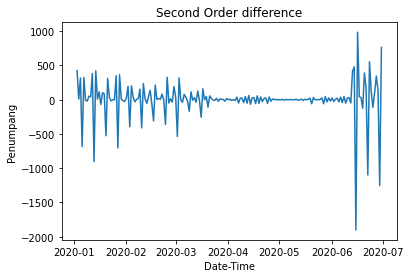

In [ ]:
first_order = df_untung.diff()
second_order = first_order.diff()
plt.plot(df_untung)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Original data')
plt.show()
plt.plot(first_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('First Order difference')
plt.show()
plt.plot(second_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Second Order difference')
plt.show()

In [ ]:
first_order.dropna(inplace=True)
dicky_fuller_test(first_order['penumpang_naik'])

ADF Statistic: -4.359517
p-value: 0.000350
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
Reject the null hypothesis (H0), the data is stationary.


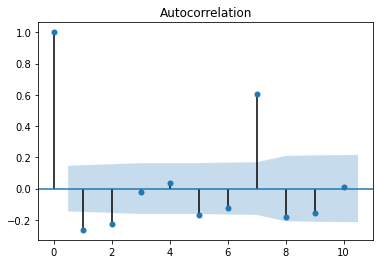

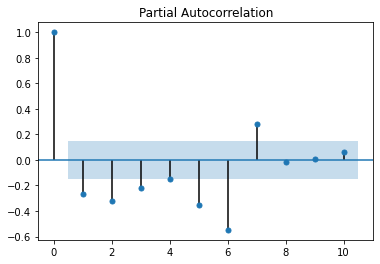

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(first_order, lags=10);
plot_pacf(first_order, lags=10);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting ARIMA model


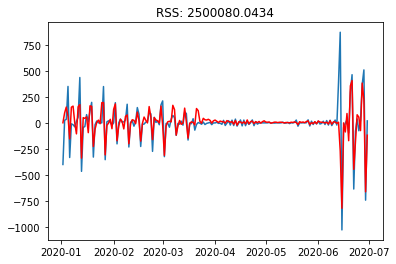

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_untung, order=(5,1,5))
results_ARIMA = model.fit()
plt.plot(first_order)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - first_order['penumpang_naik'])**2))
print('Plotting ARIMA model')

In [ ]:
predict = results_ARIMA.predict()
mean_squared_error(first_order, predict)

13812.596924773517

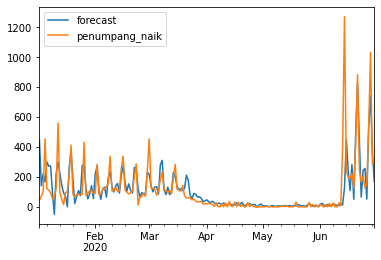

In [ ]:
results_ARIMA.plot_predict()
plt.show()

In [ ]:
x_muara = df[df.pelabuhan == 'MUARA ANGKE']['tanggal']
y_muara = df[df.pelabuhan == 'MUARA ANGKE']['penumpang_naik']

In [ ]:
df_muara = pd.concat([x_muara, y_muara], axis = 1)
df_muara

,tanggal,penumpang_naik
0,2020-01-01,549
1,2020-01-02,831
2,2020-01-03,921
3,2020-01-04,1838
4,2020-01-05,600
...,...,...
1546,2020-06-26,217
1547,2020-06-27,645
1548,2020-06-28,167
1549,2020-06-29,236


In [ ]:
df_muara = df_muara.set_index(['tanggal'])
df_muara

,penumpang_naik
tanggal,
2020-01-01,549
2020-01-02,831
2020-01-03,921
2020-01-04,1838
2020-01-05,600
...,...
2020-06-26,217
2020-06-27,645
2020-06-28,167


In [ ]:
dicky_fuller_test(df_muara['penumpang_naik'])

ADF Statistic: -1.934955
p-value: 0.315800
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
Fail to reject the null hypothesis (H0), the data is non-stationary


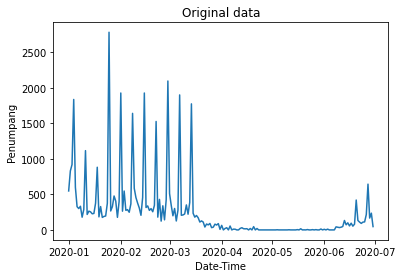

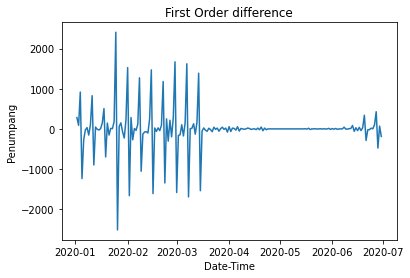

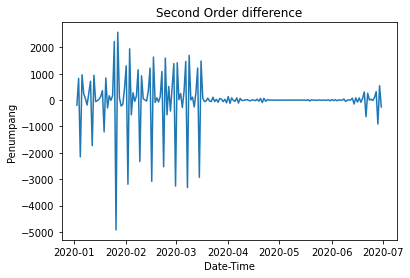

In [ ]:
first_order = df_muara.diff()
second_order = first_order.diff()
plt.plot(df_muara)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Original data')
plt.show()
plt.plot(first_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('First Order difference')
plt.show()
plt.plot(second_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Second Order difference')
plt.show()

In [ ]:
first_order.dropna(inplace=True)
dicky_fuller_test(first_order['penumpang_naik'])

ADF Statistic: -9.502996
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
Reject the null hypothesis (H0), the data is stationary.


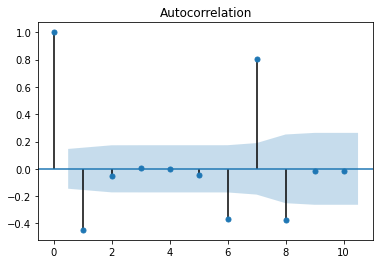

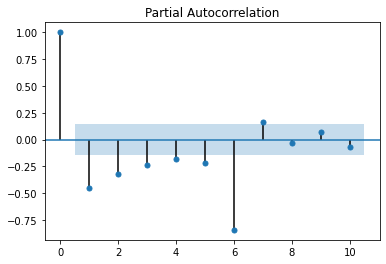

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(first_order, lags=10);
plot_pacf(first_order, lags=10);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting ARIMA model


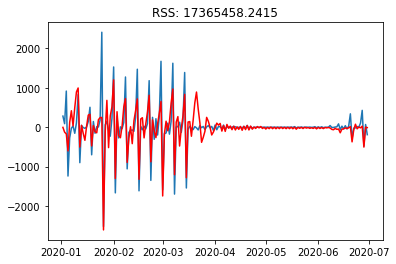

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_muara, order=(5,1,5))
results_ARIMA = model.fit()
plt.plot(first_order)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - first_order['penumpang_naik'])**2))
print('Plotting ARIMA model')

In [ ]:
predict = results_ARIMA.predict()
mean_squared_error(first_order, predict)

95941.75824018926

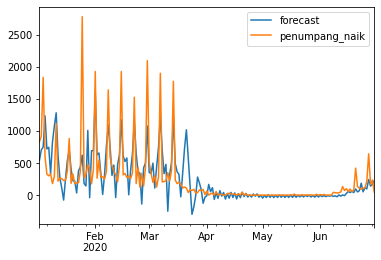

In [ ]:
results_ARIMA.plot_predict()
plt.show()

In [ ]:
x_pari = df[df.pelabuhan == 'PARI']['tanggal']
y_pari = df[df.pelabuhan == 'PARI']['penumpang_naik']

In [ ]:
df_pari = pd.concat([x_pari, y_pari], axis = 1)
df_pari

,tanggal,penumpang_naik
124,2020-01-01,885
125,2020-01-02,397
126,2020-01-03,213
127,2020-01-04,160
128,2020-01-05,559
...,...,...
1666,2020-06-26,32
1667,2020-06-27,31
1668,2020-06-28,193
1669,2020-06-29,184


In [ ]:
df_pari = df_pari.set_index(['tanggal'])
df_pari

,penumpang_naik
tanggal,
2020-01-01,885
2020-01-02,397
2020-01-03,213
2020-01-04,160
2020-01-05,559
...,...
2020-06-26,32
2020-06-27,31
2020-06-28,193


In [ ]:
dicky_fuller_test(df_pari['penumpang_naik'])

ADF Statistic: -1.568801
p-value: 0.499244
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
Fail to reject the null hypothesis (H0), the data is non-stationary


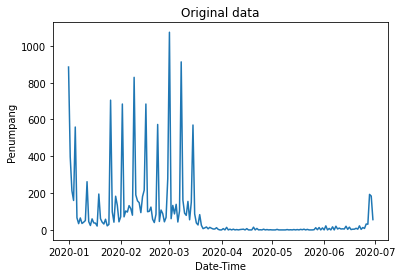

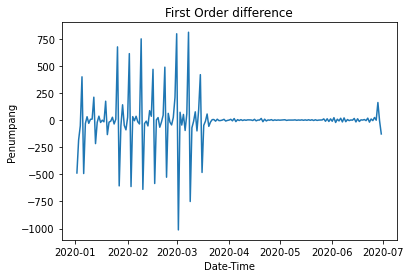

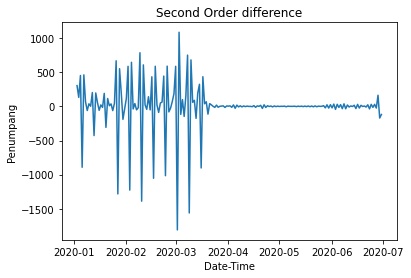

In [ ]:
first_order = df_pari.diff()
second_order = first_order.diff()
plt.plot(df_pari)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Original data')
plt.show()
plt.plot(first_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('First Order difference')
plt.show()
plt.plot(second_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Second Order difference')
plt.show()

In [ ]:
first_order.dropna(inplace=True)
dicky_fuller_test(first_order['penumpang_naik'])

ADF Statistic: -9.957772
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
Reject the null hypothesis (H0), the data is stationary.


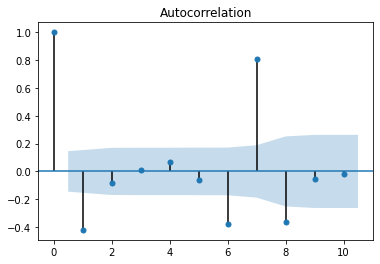

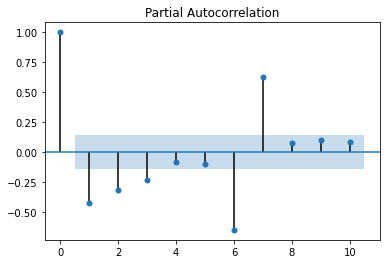

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(first_order, lags=10);
plot_pacf(first_order, lags=10);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Plotting ARIMA model


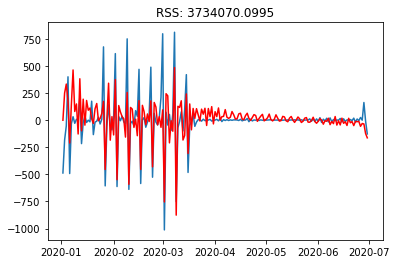

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_pari, order=(5,1,5))
results_ARIMA = model.fit()
plt.plot(first_order)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - first_order['penumpang_naik'])**2))
print('Plotting ARIMA model')

In [ ]:
predict = results_ARIMA.predict()
mean_squared_error(first_order, predict)

20630.221544020103

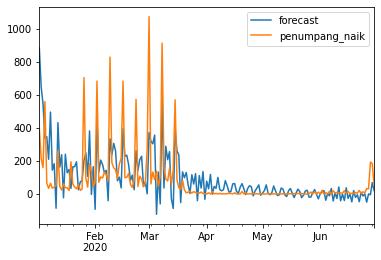

In [ ]:
results_ARIMA.plot_predict()
plt.show()

In [ ]:
x_sabira = df[df.pelabuhan == 'SABIRA']['tanggal']
y_sabira = df[df.pelabuhan == 'SABIRA']['penumpang_naik']

In [ ]:
df_sabira = pd.concat([x_sabira, y_sabira], axis = 1)
df_sabira

,tanggal,penumpang_naik
279,2020-01-01,25
280,2020-01-02,0
281,2020-01-03,0
282,2020-01-04,0
283,2020-01-05,0
...,...,...
1816,2020-06-26,8
1817,2020-06-27,0
1818,2020-06-28,12
1819,2020-06-29,0


In [ ]:
df_sabira = df_sabira.set_index(['tanggal'])
df_sabira

,penumpang_naik
tanggal,
2020-01-01,25
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
...,...
2020-06-26,8
2020-06-27,0
2020-06-28,12


In [ ]:
dicky_fuller_test(df_sabira['penumpang_naik'])

ADF Statistic: -5.753183
p-value: 0.000001
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575
Reject the null hypothesis (H0), the data is stationary.


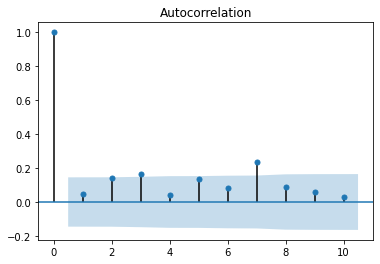

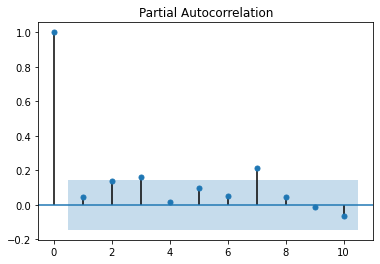

In [ ]:
plot_acf(df_sabira, lags=10);
plot_pacf(df_sabira, lags=10);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Plotting ARIMA model


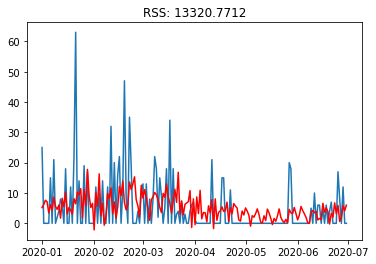

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_sabira, order=(10,0,9))
results_ARIMA = model.fit()
plt.plot(df_sabira)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df_sabira['penumpang_naik'])**2))
print('Plotting ARIMA model')

In [ ]:
predict = results_ARIMA.predict()
mean_squared_error(df_sabira, predict)

73.19105044851901

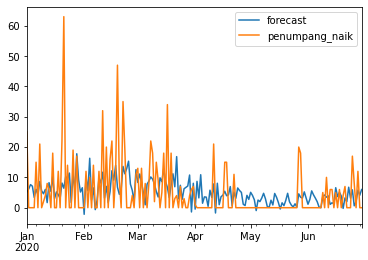

In [ ]:
results_ARIMA.plot_predict()
plt.show()

In [ ]:
x_lancang = df[df.pelabuhan == 'LANCANG']['tanggal']
y_lancang = df[df.pelabuhan == 'LANCANG']['penumpang_naik']

In [ ]:
df_lancang = pd.concat([x_lancang, y_lancang], axis = 1)
df_lancang

,tanggal,penumpang_naik
93,2020-01-01,38
94,2020-01-02,98
95,2020-01-03,76
96,2020-01-04,89
97,2020-01-05,67
...,...,...
1636,2020-06-26,68
1637,2020-06-27,79
1638,2020-06-28,113
1639,2020-06-29,67


In [ ]:
df_lancang = df_lancang.set_index(['tanggal'])
df_lancang

,penumpang_naik
tanggal,
2020-01-01,38
2020-01-02,98
2020-01-03,76
2020-01-04,89
2020-01-05,67
...,...
2020-06-26,68
2020-06-27,79
2020-06-28,113


In [ ]:
dicky_fuller_test(df_lancang['penumpang_naik'])

ADF Statistic: -1.255179
p-value: 0.649421
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
Fail to reject the null hypothesis (H0), the data is non-stationary


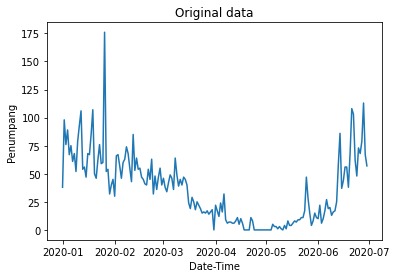

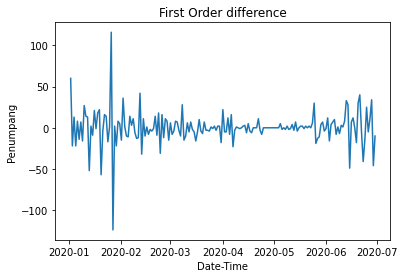

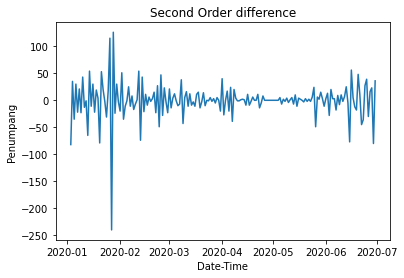

In [ ]:
first_order = df_lancang.diff()
second_order = first_order.diff()
plt.plot(df_lancang)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Original data')
plt.show()
plt.plot(first_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('First Order difference')
plt.show()
plt.plot(second_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Second Order difference')
plt.show()

In [ ]:
first_order.dropna(inplace=True)
dicky_fuller_test(first_order['penumpang_naik'])

ADF Statistic: -4.965404
p-value: 0.000026
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
Reject the null hypothesis (H0), the data is stationary.


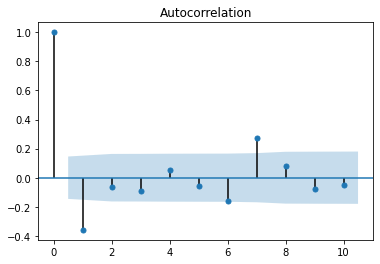

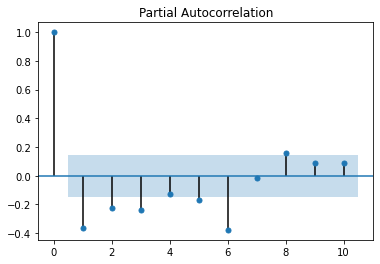

In [ ]:
plot_acf(first_order, lags=10);
plot_pacf(first_order, lags=10);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting ARIMA model


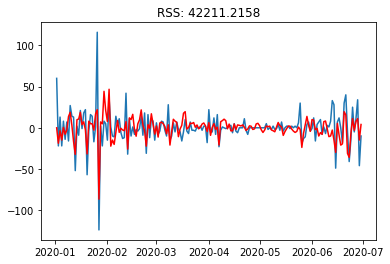

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_lancang, order=(6,1,5))
results_ARIMA = model.fit()
plt.plot(first_order)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - first_order['penumpang_naik'])**2))
print('Plotting ARIMA model')

In [ ]:
predict = results_ARIMA.predict()
mean_squared_error(first_order, predict)

233.21113712984157

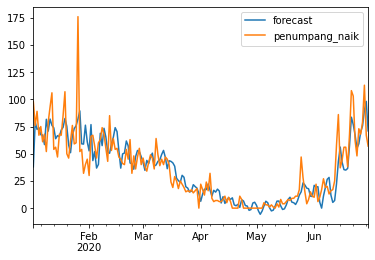

In [ ]:
results_ARIMA.plot_predict()
plt.show()

In [ ]:
x_pramuka = df[df.pelabuhan == 'PRAMUKA/PANGGANG']['tanggal']
y_pramuka = df[df.pelabuhan == 'PRAMUKA/PANGGANG']['penumpang_naik']

In [ ]:
df_pramuka = pd.concat([x_pramuka, y_pramuka], axis = 1)
df_pramuka

,tanggal,penumpang_naik
186,2020-01-01,307
187,2020-01-02,466
188,2020-01-03,252
189,2020-01-04,208
190,2020-01-05,230
...,...,...
1726,2020-06-26,98
1727,2020-06-27,80
1728,2020-06-28,241
1729,2020-06-29,62


In [ ]:
df_pramuka = df_pramuka.set_index(['tanggal'])
df_pramuka

,penumpang_naik
tanggal,
2020-01-01,307
2020-01-02,466
2020-01-03,252
2020-01-04,208
2020-01-05,230
...,...
2020-06-26,98
2020-06-27,80
2020-06-28,241


In [ ]:
dicky_fuller_test(df_pramuka['penumpang_naik'])

ADF Statistic: -1.189702
p-value: 0.678010
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
Fail to reject the null hypothesis (H0), the data is non-stationary


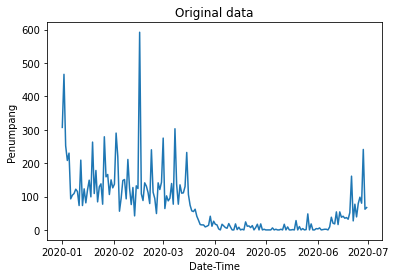

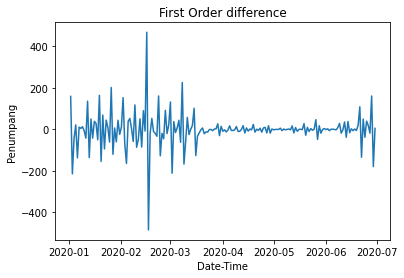

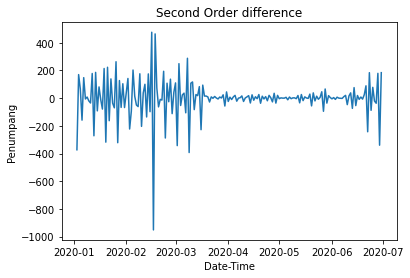

In [ ]:
first_order = df_pramuka.diff()
second_order = first_order.diff()
plt.plot(df_pramuka)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Original data')
plt.show()
plt.plot(first_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('First Order difference')
plt.show()
plt.plot(second_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Second Order difference')
plt.show()

In [ ]:
first_order.dropna(inplace=True)
dicky_fuller_test(first_order['penumpang_naik'])

ADF Statistic: -4.833067
p-value: 0.000047
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
Reject the null hypothesis (H0), the data is stationary.


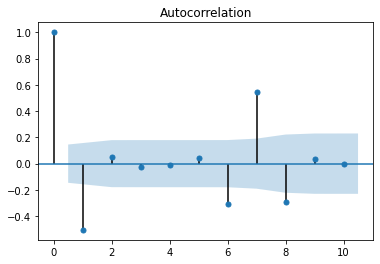

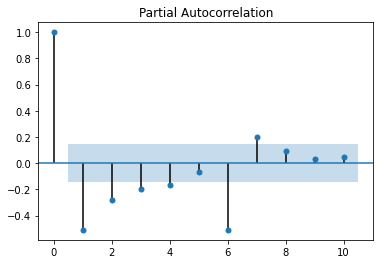

In [ ]:
plot_acf(first_order, lags=10);
plot_pacf(first_order, lags=10);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting ARIMA model


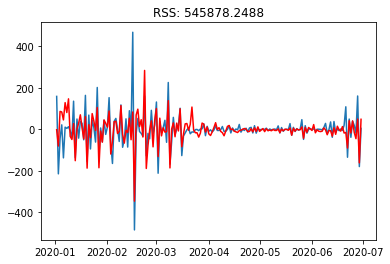

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_pramuka, order=(6,1,5))
results_ARIMA = model.fit()
plt.plot(first_order)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - first_order['penumpang_naik'])**2))
print('Plotting ARIMA model')

In [ ]:
predict = results_ARIMA.predict()
mean_squared_error(first_order, predict)

3015.9019268819457

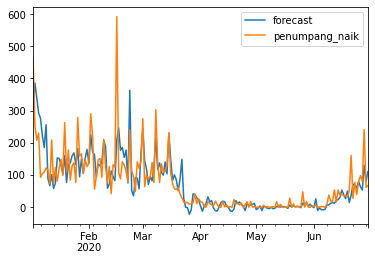

In [ ]:
results_ARIMA.plot_predict()
plt.show()

In [ ]:
x_tidung = df[df.pelabuhan == 'TIDUNG/PAYUNG']['tanggal']
y_tidung = df[df.pelabuhan == 'TIDUNG/PAYUNG']['penumpang_naik']

In [ ]:
df_tidung = pd.concat([x_tidung, y_tidung], axis = 1)
df_tidung

,tanggal,penumpang_naik
155,2020-01-01,1705
156,2020-01-02,681
157,2020-01-03,446
158,2020-01-04,333
159,2020-01-05,451
...,...,...
1696,2020-06-26,23
1697,2020-06-27,9
1698,2020-06-28,112
1699,2020-06-29,66


In [ ]:
df_tidung = df_tidung.set_index(['tanggal'])
df_tidung

,penumpang_naik
tanggal,
2020-01-01,1705
2020-01-02,681
2020-01-03,446
2020-01-04,333
2020-01-05,451
...,...
2020-06-26,23
2020-06-27,9
2020-06-28,112


In [ ]:
dicky_fuller_test(df_tidung['penumpang_naik'])

ADF Statistic: -1.186688
p-value: 0.679296
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
Fail to reject the null hypothesis (H0), the data is non-stationary


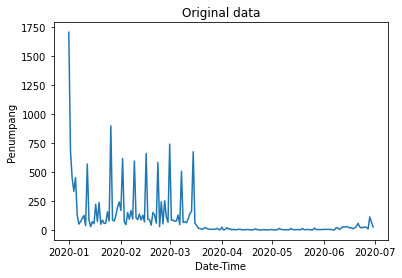

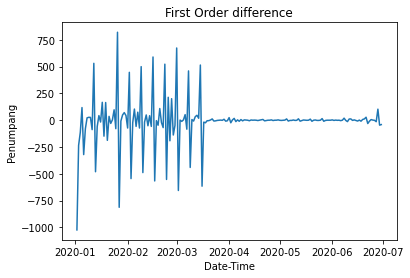

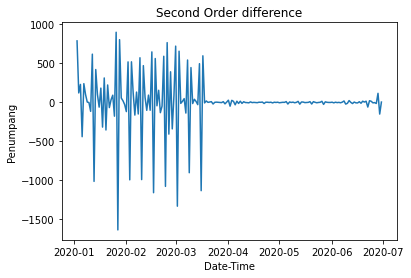

In [ ]:
first_order = df_tidung.diff()
second_order = first_order.diff()
plt.plot(df_tidung)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Original data')
plt.show()
plt.plot(first_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('First Order difference')
plt.show()
plt.plot(second_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Second Order difference')
plt.show()

In [ ]:
first_order.dropna(inplace=True)
dicky_fuller_test(first_order['penumpang_naik'])

ADF Statistic: -6.141270
p-value: 0.000000
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
Reject the null hypothesis (H0), the data is stationary.


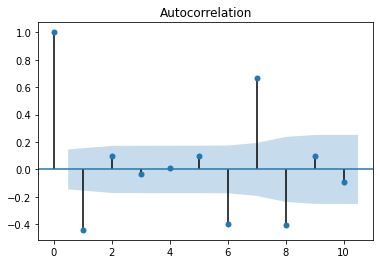

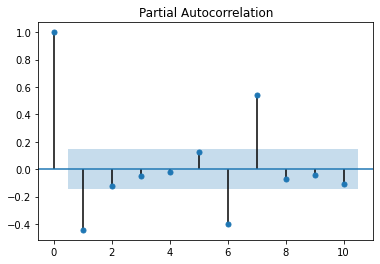

In [ ]:
plot_acf(first_order, lags=10);
plot_pacf(first_order, lags=10);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting ARIMA model


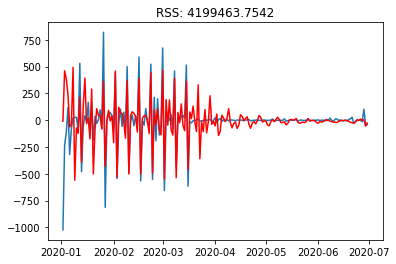

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_tidung, order=(7,1,6))
results_ARIMA = model.fit()
plt.plot(first_order)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - first_order['penumpang_naik'])**2))
print('Plotting ARIMA model')

In [ ]:
predict = results_ARIMA.predict()
mean_squared_error(first_order, predict)

23201.457205674895

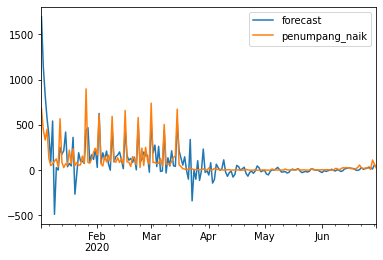

In [ ]:
results_ARIMA.plot_predict()
plt.show()

In [ ]:
x_harapan = df[df.pelabuhan == 'HARAPAN']['tanggal']
y_harapan = df[df.pelabuhan == 'HARAPAN']['penumpang_naik']

In [ ]:
df_harapan = pd.concat([x_harapan, y_harapan], axis = 1)
df_harapan

,tanggal,penumpang_naik
248,2020-01-01,1032
249,2020-01-02,121
250,2020-01-03,65
251,2020-01-04,57
252,2020-01-05,381
...,...,...
1786,2020-06-26,4
1787,2020-06-27,0
1788,2020-06-28,128
1789,2020-06-29,9


In [ ]:
df_harapan = df_harapan.set_index(['tanggal'])
df_harapan

,penumpang_naik
tanggal,
2020-01-01,1032
2020-01-02,121
2020-01-03,65
2020-01-04,57
2020-01-05,381
...,...
2020-06-26,4
2020-06-27,0
2020-06-28,128


In [ ]:
dicky_fuller_test(df_harapan['penumpang_naik'])

ADF Statistic: -1.496308
p-value: 0.535337
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
Fail to reject the null hypothesis (H0), the data is non-stationary


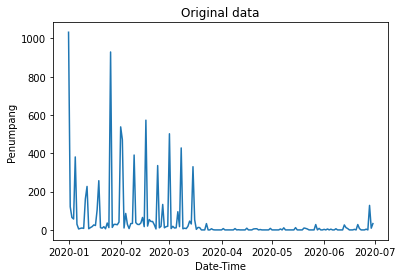

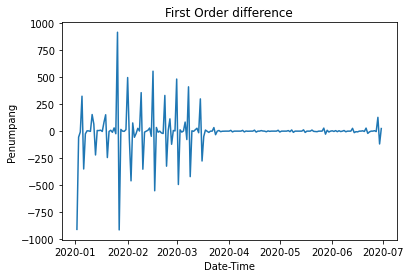

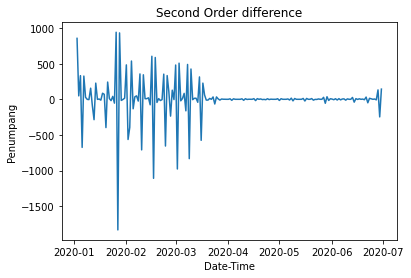

In [ ]:
first_order = df_harapan.diff()
second_order = first_order.diff()
plt.plot(df_harapan)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Original data')
plt.show()
plt.plot(first_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('First Order difference')
plt.show()
plt.plot(second_order)
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Penumpang', fontsize=10)
plt.title('Second Order difference')
plt.show()

In [ ]:
first_order.dropna(inplace=True)
dicky_fuller_test(first_order['penumpang_naik'])

ADF Statistic: -5.095179
p-value: 0.000014
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576
Reject the null hypothesis (H0), the data is stationary.


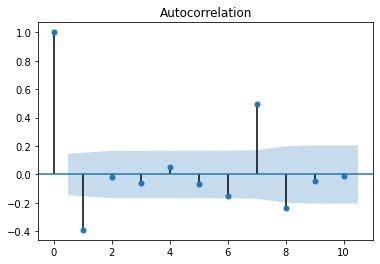

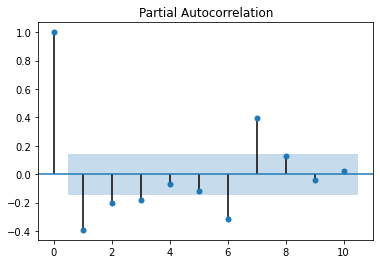

In [ ]:
plot_acf(first_order, lags=10);
plot_pacf(first_order, lags=10);

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting ARIMA model


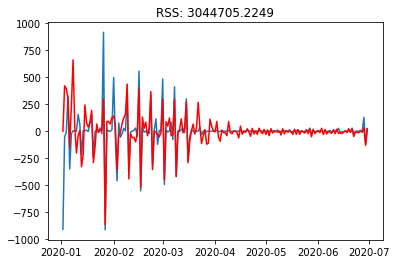

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_harapan, order=(7,1,6))
results_ARIMA = model.fit()
plt.plot(first_order)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - first_order['penumpang_naik'])**2))
print('Plotting ARIMA model')

In [ ]:
predict = results_ARIMA.predict()
mean_squared_error(first_order, predict)

16821.57582811223

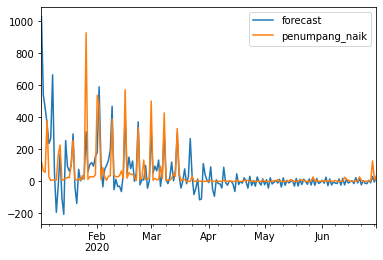

In [ ]:
results_ARIMA.plot_predict()
plt.show()